In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [192]:
data = pd.read_csv('./data/lung_cancer/lung cancer survey.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


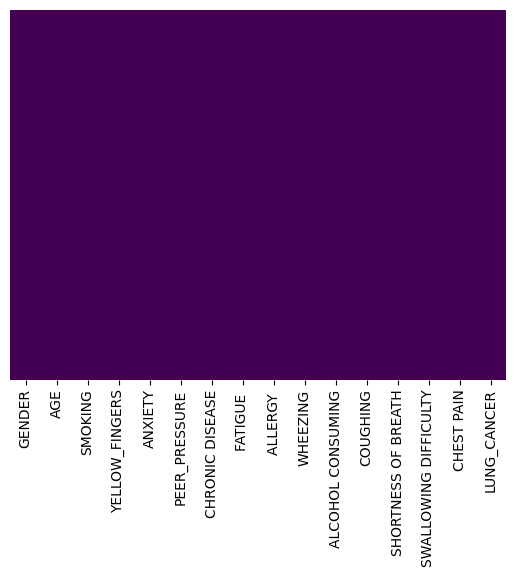

In [193]:
#Heat map to check missing values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [194]:
#Oldest person in dataset
data.AGE.idxmax()
data.iloc[277]

GENDER                    F
AGE                      87
SMOKING                   1
YELLOW_FINGERS            1
ANXIETY                   1
PEER_PRESSURE             1
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   1
WHEEZING                  1
ALCOHOL CONSUMING         1
COUGHING                  1
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     1
CHEST PAIN                1
LUNG_CANCER              NO
Name: 277, dtype: object

In [195]:
#Youngest person in dataset
data.AGE.idxmin()
data.iloc[22]

GENDER                    F
AGE                      21
SMOKING                   2
YELLOW_FINGERS            1
ANXIETY                   1
PEER_PRESSURE             1
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  1
ALCOHOL CONSUMING         1
COUGHING                  1
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     1
CHEST PAIN                1
LUNG_CANCER              NO
Name: 22, dtype: object

In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [197]:
#Change gender to numeric for machine learning
data['GENDER'] = data['GENDER'].map({'M': 1, "F":2})
data['GENDER'] = data['GENDER'].astype('int64')

In [198]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [199]:
fig = px.sunburst(data, path=['LUNG_CANCER'])
fig.show()

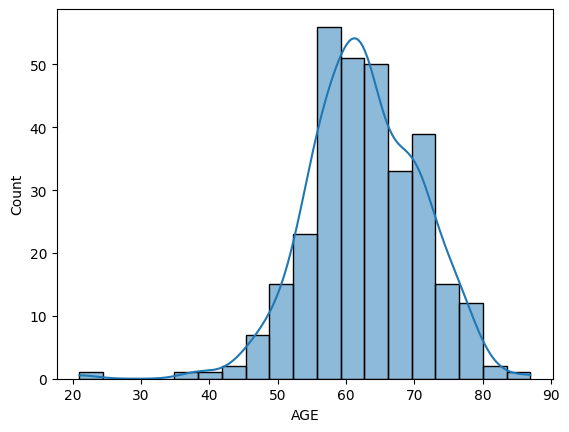

In [200]:
sns.histplot(data=data, x=data.AGE, kde=True)
plt.show()

<Axes: >

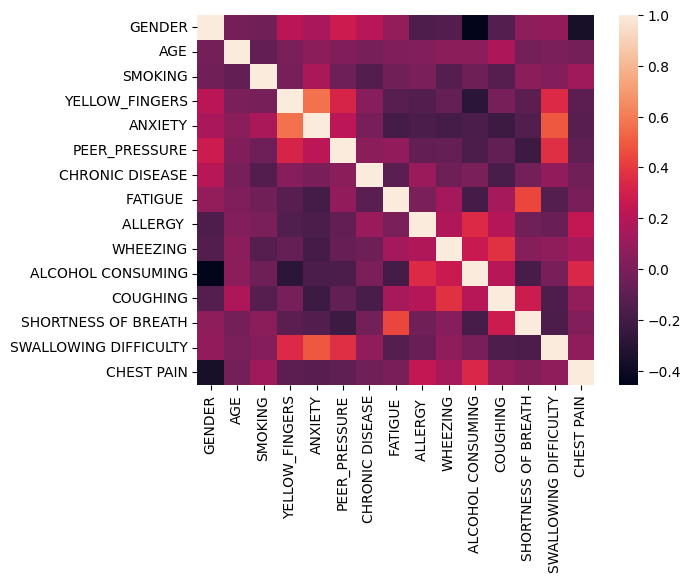

In [201]:
sns.heatmap(data.corr(numeric_only=True))

Logistic Regression

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [203]:
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1, 'NO': 2})

In [204]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [205]:
X = data[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']]
y = data['LUNG_CANCER']

In [206]:
data['LUNG_CANCER']

0      1
1      1
2      2
3      2
4      2
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [208]:
rf = RandomForestClassifier()

In [216]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators' : [10,20,30,40,50],
    'min_samples_split' : [2,4,8],
    'bootstrap' : [True, False]
}

In [217]:
grid_search = GridSearchCV(estimator= rf, param_grid = param_grid, cv= 5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END bootstrap=True, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, min_samples

{'bootstrap': True, 'min_samples_split': 4, 'n_estimators': 10}

In [ ]:
print(f'Best Hyperparameters: {grid_search.best_params_})


In [211]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [218]:
pred = rf.predict(X_test)
pred

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [219]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.9193548387096774
